### We would like to segment the customers into a number of groups for targeted marketing

### A program to cluster a set of points using the K-means clustering algorithm

## DATASET
The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 																								
- Sex																		
- Marital status							
- Age																
- Education																		
- Income	
- Occupation												
- Settlement size					

### import libraries

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [67]:
df = pd.read_csv("Project3.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### Convert df to numpy array and normalize the values of df  

In [3]:
df = pd.read_csv("Project3.csv")
df = df.drop(df.columns[0], axis=1)
dataset = df.to_numpy()
mean = np.mean(dataset, axis = 0)
stdDev = np.std(dataset, axis = 0)
dataset = (dataset-mean)/stdDev

In [4]:
dataset

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [5]:
dataset.shape[0]

2000

### Initialize the cluster's centers

In [6]:
def center_init(data, k):
    # randomly choose a data
    index = np.random.choice(data.shape[0], k, replace=False) 
    rows = []
    for i in index:
        rows.append(data[i])
    np.array(rows)
    return rows

### Calculate new centroid with mean value

In [7]:
def calculate_new_centroid(classified, centroids):
    # argument classified is a dictionary
    for key in classified.keys():
        values = np.array(classified.get(key))
        centroids[int(key)] = np.mean(values, axis=0)
    return centroids

### calculate euclidean distance

In [8]:
def calculateDistance(x, y):
    dist = np.sqrt(np.sum((x - y)**2))
    return dist

### Defining K-means

In [9]:
def kMeans(data, centroids, iterations, k):
    length = len(data)
    for itr in range(0,iterations):
        classified = {}
        clusterIndex = {}
        for index in range(0, length):
            point = data[index]
            distance = []
            for pos in range(0,k):
                center = centroids[pos]
                distance.append(calculateDistance(point, center))
            minIndex = distance.index(min(distance))
            if str(minIndex) in classified.keys():
                classified[str(minIndex)].append(data[index])
                clusterIndex[str(minIndex)].append(index)
            else:
                classified[str(minIndex)] = [data[index]]
                clusterIndex[str(minIndex)] = [index]
        if itr != iterations-1:
            centroids = calculate_new_centroid(classified, centroids)
    return classified, centroids, clusterIndex

### silhouetteCoefficient calculation

In [10]:
def intraClusterDist(point, cluster):
    length = len(cluster)
    distance = 0
    for i in range(0, length):
        distance += calculateDistance(point, cluster[i])
    return distance

In [11]:
def minInterClusterDist(point, clusters, clusterId):
    minCluster = []
    for key in clusters.keys():
        if key != clusterId:
            clusterLength = len(clusters.get(key))
            values = np.array(clusters.get(key))
            minCluster.append(intraClusterDist(point, values)/clusterLength)
    return min(minCluster)        

In [12]:
def silhouetteCoefficient(clusters, centroids):
    index = []
    result = []
    for key in clusters.keys():
        clusterLength = len(clusters.get(key))
        values = np.array(clusters.get(key))
        for i in range(0, clusterLength):
            a = intraClusterDist(values[i], values)/(len(values)-1)
            newDict = clusters.copy()
            newDict.pop(key)
            b = minInterClusterDist(values[i], newDict, key)
            index.append((b-a)/max(a,b))
        result.append(np.average(index))
    return max(result)

### KMeans clustering

In [13]:
def kMeansClustering(data, k):
    cluster = {}
    iterations = 20
    initCentroids = center_init(data, k)
    clustersKMeans, centroids, clusterIndex = kMeans(data , initCentroids, iterations, k)
    score = silhouetteCoefficient(clustersKMeans, centroids)
    return score, clusterIndex

- scores contain list of all silhouetteCoefficient values for the values of k = 2 to 6
- clusters is a dictionary of type dictionary 
- clusters[6] = {'0': [0,8,....],
                 '2':[1,77,....],
                ...
                 '5':[44,66,77,...]
                }

In [44]:
scores = []
clusters = {}

for k in range(2,7):
    score, cluster = kMeansClustering(dataset,k)
    scores.append(score)
    clusters[k] = cluster

In [45]:
scores

[0.24820106944568027,
 0.2848008165797193,
 0.27002942656571455,
 0.25432408467364304,
 0.2792678236415544]

from the above list of scores we have seen that score for k = 3 is hightest which is 0.284801030327

In [54]:
third_cluster = clusters[3]

In [48]:
label = [-1] * 2000 # initialization
len(label)

2000

In [56]:
for x in third_cluster.keys():
    #print(x)
    values = third_cluster.get(x)
    for val in values:
        label[val] = int(x)

In [57]:
label

[2,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 0,


In [58]:
outputs = [int(x+1) for x in label] 

In [59]:
with open("21CS60A01_P3.out", "w") as f:
    for val in outputs:
        f.write(str(val)+" ")

### In my opinion at k = 6 the inter-cluster distance is actually forming valid clusters.

# Visualizing the K-means with 2 data fields only 

In [68]:
df_new = df[["Age","Income"]]
df_new.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


In [69]:
df_new.describe()

,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


In [70]:
df_new.isnull().sum()

Age       0
Income    0
dtype: int64

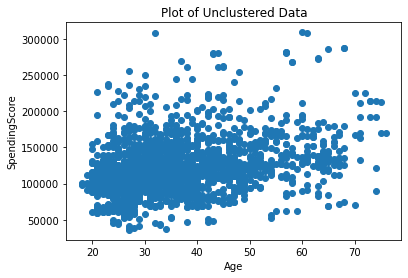

In [71]:
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1])
plt.xlabel('Age')
plt.ylabel('SpendingScore')
plt.title('Plot of Unclustered Data')
plt.show()

## Selecting six points randomly

I am visualizing the datapoints with 6 points as it has the second hightest silhoutte score 

In [78]:
k = 6#Assuming the value of k to be 6
np.random.seed(40)

#Here, we are selecting six points randomly as centroids 
random_centroids=[]
for i in range(1,k+1):
    random_centroids.append([np.random.randint(18, 76), np.random.randint(35832,309364)])#Here, we have selecting the random values between 1 and 100 because most of of our values lie in this range
print('Randomly selected points as random_centroids:',random_centroids)

Randomly selected points as random_centroids: [[24, 150201], [30, 172863], [68, 236043], [49, 280386], [73, 240587], [45, 225965]]


Plotting 6 points in the graph

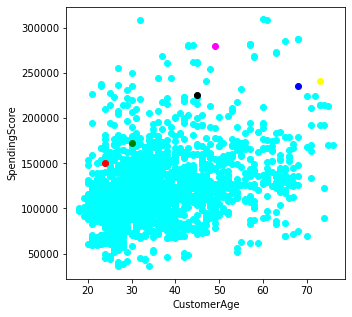

In [80]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','magenta','yellow','black']
for i in range(length):
    plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.show()

### Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster


In [82]:
#Step-2

#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
def assignment(df_new,random_centroids):
    for i in range(length) :
        df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))

    list1=[]
    list2=[]
    for a,b,c,d,e,f in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2'],df_new['Distance from Centroid 3'],df_new['Distance from Centroid 4'],df_new['Distance from Centroid 5']):
        mn = min(a,b,c,d,e,f)

        if mn == a:
            list1.append(0)
            list2.append('r')
        elif mn == b:
            list1.append(1)
            list2.append('g')
        elif mn == c:
            list1.append(2)
            list2.append('b')
        elif mn == d:
            list1.append(3)
            list2.append('magenta')
        elif mn == e:
            list1.append(4)
            list2.append('yellow')
        elif mn == f:
            list1.append(5)
            list2.append('black')
    df_new['Closest_Centroid'] = list1
    df_new['Color']=list2
    return df_new

In [83]:
df_new = assignment(df_new, random_centroids)
df_new.head()

<ipython-input-82-8d5daaf10b7a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))


,Age,Income,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color,Distance from Centroid 3,Distance from Centroid 4,Distance from Centroid 5
0,67,124670,25531.036211,48193.014203,111373.000004,0,r,155716.001040,115917.000155,101295.002389
1,22,150773,572.003496,22090.001449,85270.012408,0,r,129613.002812,89814.014480,75192.003518
2,49,89210,60991.005124,83653.002158,146833.001229,0,r,191176.000000,151377.001903,136755.000058
3,45,171565,21364.010321,1298.086669,64478.004102,1,g,108821.000074,69022.005679,54400.000000
4,53,149031,1170.359347,23832.011099,87012.001293,0,r,131355.000061,91556.002184,76934.000416


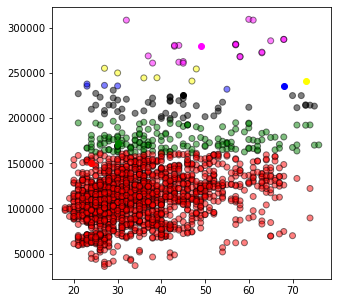

In [84]:
#Plotting the clusters
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color =df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
    plt.scatter(*random_centroids[i],color=colors1[i])

# Step-3

## Update Stage
### In this satge, we are updating the centroids of the newly formed clusters

In [85]:
def update(parameter):
    for i in range(length):
        random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['Age'])
        random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i]['Income'])
    return parameter

In [86]:
random_centroids = update(random_centroids)
random_centroids

[[34.84195565662308, 110772.70835702104],
 [43.35, 175372.6],
 [31.6, 235426.4],
 [52.666666666666664, 279460.5714285714],
 [37.833333333333336, 248337.0],
 [42.93877551020408, 213555.14285714287]]

### Repeat Assignment Step
### Here, we are again calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster

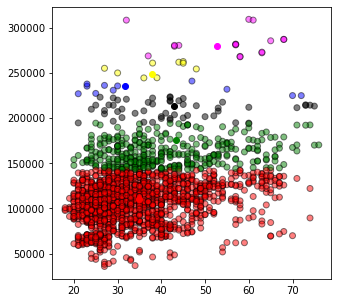

In [87]:
df_new = assignment(df_new, random_centroids)  
df_new.head()
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
for i in range(length):
    plt.scatter(*random_centroids[i], color=colors1[i])
plt.show()

## Step-4

### In this step, we are going to keep repeating the update centroid and the assignment stage until the centroids stop changing i.e. No New Clusters being formed.

In [88]:
count=1
while True:
    old_random_centroids = np.round(random_centroids)
    print('Old Centroid',old_random_centroids)
    count+=1
    random_centroids = update(random_centroids)

    new_random_centroids = np.round(random_centroids)
    print('New Centroid',new_random_centroids)

    df_new = assignment(df_new, random_centroids)
    result=np.allclose(old_random_centroids,new_random_centroids)#np.allclose() function checks if two arrays are equal element-wise
    print(result)
    if result == True:
        break
  
    
print(count)

Old Centroid [[3.50000e+01 1.10773e+05]
 [4.30000e+01 1.75373e+05]
 [3.20000e+01 2.35426e+05]
 [5.30000e+01 2.79461e+05]
 [3.80000e+01 2.48337e+05]
 [4.30000e+01 2.13555e+05]]
New Centroid [[3.40000e+01 1.05547e+05]
 [4.10000e+01 1.61451e+05]
 [3.80000e+01 2.32132e+05]
 [5.50000e+01 2.83662e+05]
 [3.90000e+01 2.55040e+05]
 [4.30000e+01 2.09774e+05]]
False
Old Centroid [[3.40000e+01 1.05547e+05]
 [4.10000e+01 1.61451e+05]
 [3.80000e+01 2.32132e+05]
 [5.50000e+01 2.83662e+05]
 [3.90000e+01 2.55040e+05]
 [4.30000e+01 2.09774e+05]]
New Centroid [[3.40000e+01 1.02382e+05]
 [4.10000e+01 1.52972e+05]
 [3.80000e+01 2.28810e+05]
 [5.60000e+01 2.86939e+05]
 [4.20000e+01 2.58374e+05]
 [4.50000e+01 2.02560e+05]]
False
Old Centroid [[3.40000e+01 1.02382e+05]
 [4.10000e+01 1.52972e+05]
 [3.80000e+01 2.28810e+05]
 [5.60000e+01 2.86939e+05]
 [4.20000e+01 2.58374e+05]
 [4.50000e+01 2.02560e+05]]
New Centroid [[3.30000e+01 1.00146e+05]
 [4.00000e+01 1.47444e+05]
 [3.90000e+01 2.25970e+05]
 [5.50000e+01 

False
Old Centroid [[3.30000e+01 7.47250e+04]
 [3.20000e+01 1.06132e+05]
 [4.10000e+01 1.62685e+05]
 [4.90000e+01 2.72544e+05]
 [4.30000e+01 2.07472e+05]
 [3.80000e+01 1.31165e+05]]
New Centroid [[3.20000e+01 7.44200e+04]
 [3.20000e+01 1.05728e+05]
 [4.10000e+01 1.62249e+05]
 [4.90000e+01 2.72544e+05]
 [4.30000e+01 2.07472e+05]
 [3.90000e+01 1.30599e+05]]
False
Old Centroid [[3.20000e+01 7.44200e+04]
 [3.20000e+01 1.05728e+05]
 [4.10000e+01 1.62249e+05]
 [4.90000e+01 2.72544e+05]
 [4.30000e+01 2.07472e+05]
 [3.90000e+01 1.30599e+05]]
New Centroid [[3.20000e+01 7.43760e+04]
 [3.20000e+01 1.05469e+05]
 [4.10000e+01 1.62027e+05]
 [4.90000e+01 2.72544e+05]
 [4.30000e+01 2.07472e+05]
 [3.90000e+01 1.30191e+05]]
False
Old Centroid [[3.20000e+01 7.43760e+04]
 [3.20000e+01 1.05469e+05]
 [4.10000e+01 1.62027e+05]
 [4.90000e+01 2.72544e+05]
 [4.30000e+01 2.07472e+05]
 [3.90000e+01 1.30191e+05]]
New Centroid [[3.20000e+01 7.42910e+04]
 [3.20000e+01 1.05334e+05]
 [4.10000e+01 1.61780e+05]
 [4.9000

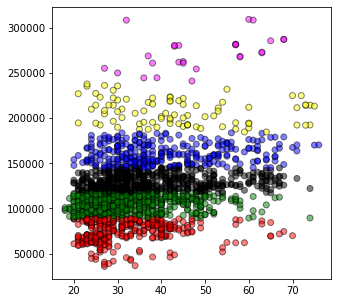

In [89]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
plt.show()

In [90]:
df_new['Closest_Centroid'] 

0       5
1       2
2       1
3       2
4       2
       ..
1995    5
1996    5
1997    0
1998    1
1999    0
Name: Closest_Centroid, Length: 2000, dtype: int64

In [38]:
ops = df_new['Closest_Centroid'].tolist()
# outputs = [x+1 for x in ops] # in program cluster starts from 0 to 5 but in our case cluster 
                             # will be from 1 to 6 ( I am taking 6 clusters)
